## Loading Data and pandas library

In [1]:
import pandas as pd
census_df = pd.read_csv("adult.data", header=None) #good way of opening .data file in pd when headers are not provided
census_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [2]:
#Extra note on how to make dataframe and add col names
# creating lists
l1 =["Amar", "Barsha", "Carlos", "Tanmay", "Misbah"]
l2 =["Alpha", "Bravo", "Charlie", "Tango", "Mike"]
l3 =[23, 25, 22, 27, 29]
l4 =[69, 54, 73, 70, 74]
  
# creating the DataFrame
team = pd.DataFrame(list(zip(l1, l2, l3, l4))) 
  
# displaying the DataFrame
print(team)

        0        1   2   3
0    Amar    Alpha  23  69
1  Barsha    Bravo  25  54
2  Carlos  Charlie  22  73
3  Tanmay    Tango  27  70
4  Misbah     Mike  29  74


In [3]:
# adding column name to the respective columns
team.columns = ['Name', 'Code', 'Age', 'Weight']
  
# displaying the DataFrame
print(team)

     Name     Code  Age  Weight
0    Amar    Alpha   23      69
1  Barsha    Bravo   25      54
2  Carlos  Charlie   22      73
3  Tanmay    Tango   27      70
4  Misbah     Mike   29      74


# Basic EDA
### Assigning col names to the df

In [4]:
census_df.columns = ['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary']
census_df.head() 

,age,workclass,fnlgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#No missing data points
census_df.isnull().sum()

age               0
workclass         0
fnlgt             0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
salary            0
dtype: int64

## checking basic stat

In [6]:
census_df.describe()

,age,fnlgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## check whether the dataset is balanced or not

In [7]:
census_df['salary'].value_counts(normalize = True)

 <=50K    0.75919
 >50K     0.24081
Name: salary, dtype: float64

## Above EDA can be put in to single function

In [8]:
#  Lets write one function to find out 
## missing values ,unique values ,data types  --> EDA
def df_summary(df):
    df_U = df.nunique()
    df_M = df.isnull().sum()
    df_I = df.dtypes
    
    ## converting all data to dataframe
    df_U = df_U.to_frame().reset_index()
    df_M = df_M.to_frame().reset_index()
    df_I = df_I.to_frame().reset_index()
    
    ## renaming columns to default 0 to some sensible name
    df_U = df_U.rename(columns= {0: 'Unique Data'})
    df_M = df_M.rename(columns= {0: 'Missing Data'})
    df_I = df_I.rename(columns= {0: 'Data Types'})
    
    ## concatting the 3 dataframes. Remember pd.merge can merge only 2 df at a time
    output = pd.merge(pd.merge(df_M,df_U,on='index'),df_I,on='index')
    
    return output;

In [9]:
df_summary(census_df)

,index,Missing Data,Unique Data,Data Types
0,age,0,73,int64
1,workclass,0,9,object
2,fnlgt,0,21648,int64
3,education,0,16,object
4,education_num,0,16,int64
5,marital_status,0,7,object
6,occupation,0,15,object
7,relationship,0,6,object
8,race,0,5,object
9,sex,0,2,object


## Incase you had miss_classified cols:

In [10]:
## Seems the variables is wrongly classified as object data type .
## We will convert it into Numerical
#eg. if salary col is miss classified as object
#census_df.salary = pd.to_numeric(census_df.salary, errors='coerce')
## Note : errors{‘ignore’, ‘raise’, ‘coerce’}, default ‘raise’
## If ‘raise’, then invalid parsing will raise an exception.
## If ‘coerce’, then invalid parsing will be set as NaN.
## If ‘ignore’, then invalid parsing will return the input.
## More here : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
#census_df.salary.describe()

In [11]:
## Lets seperate Object Columns and Numerical Columns 

Num_Cols=census_df.select_dtypes(include=['int64']).columns.tolist()
#if there would have been more that one type of numeric data type
#Num_Cols=Tdata.select_dtypes(include=['float64','int64']).columns.tolist()
cat_col=census_df.select_dtypes(include=['object']).columns.tolist()

## Why we should do this ?
## Numrical and categorical colns need different kinds of processing 
## like Numrical colmns need scaling
## and Categorical colns need feature engineeering like one-hot encoding 

In [12]:
# Creating function to see all the object data type variables 
## using single function
def cat_col_desc(data):
    col_list = data.select_dtypes(include=['object']).columns.tolist()
    for i in col_list: 
        print("Variable :", i)
        print("Count of unique values :", len(set( data[i])))
        print("Unique values : " ,set( data[i]))
        print("================================")
        
cat_col_desc(census_df)

# alternative way
# cat_col = census_df.select_dtypes(include=[object]).columns
# for col in cat_col:
#     print("column {} -> {}\n".format(col, census_df[col].unique()))

Variable : workclass
Count of unique values : 9
Unique values :  {' Never-worked', ' Self-emp-inc', ' Federal-gov', ' Private', ' Local-gov', ' Without-pay', ' State-gov', ' ?', ' Self-emp-not-inc'}
Variable : education
Count of unique values : 16
Unique values :  {' Assoc-voc', ' 11th', ' 1st-4th', ' Preschool', ' Masters', ' 12th', ' Assoc-acdm', ' HS-grad', ' Doctorate', ' Some-college', ' 10th', ' Prof-school', ' Bachelors', ' 7th-8th', ' 9th', ' 5th-6th'}
Variable : marital_status
Count of unique values : 7
Unique values :  {' Married-spouse-absent', ' Widowed', ' Separated', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Never-married'}
Variable : occupation
Count of unique values : 15
Unique values :  {' Other-service', ' Craft-repair', ' Machine-op-inspct', ' Priv-house-serv', ' Handlers-cleaners', ' Farming-fishing', ' Tech-support', ' ?', ' Armed-Forces', ' Transport-moving', ' Adm-clerical', ' Protective-serv', ' Sales', ' Prof-specialty', ' Exec-managerial'}
Va

## Drop rows with '?'

In [13]:
# count '?' in each cat column
for col in cat_col:
    filt = census_df[col] == ' ?'
    print("number of ? in column {} -> {}".format(col, filt.sum()))

# Drop rows with '?'
census_df = census_df[census_df['workclass'] != '?']
census_df = census_df[census_df['occupation'] != '?']
census_df = census_df[census_df['native_country'] != '?']

for col in cat_col:
    filt = census_df[col] == '?'
    print("number of ? in column {} -> {}".format(col, filt.sum()))

number of ? in column workclass -> 1836
number of ? in column education -> 0
number of ? in column marital_status -> 0
number of ? in column occupation -> 1843
number of ? in column relationship -> 0
number of ? in column race -> 0
number of ? in column sex -> 0
number of ? in column native_country -> 583
number of ? in column salary -> 0
number of ? in column workclass -> 0
number of ? in column education -> 0
number of ? in column marital_status -> 0
number of ? in column occupation -> 0
number of ? in column relationship -> 0
number of ? in column race -> 0
number of ? in column sex -> 0
number of ? in column native_country -> 0
number of ? in column salary -> 0


In [14]:
cat_col_desc(census_df)

Variable : workclass
Count of unique values : 9
Unique values :  {' Never-worked', ' Self-emp-inc', ' Federal-gov', ' Private', ' Local-gov', ' Without-pay', ' State-gov', ' ?', ' Self-emp-not-inc'}
Variable : education
Count of unique values : 16
Unique values :  {' Assoc-voc', ' 11th', ' 1st-4th', ' Preschool', ' Masters', ' 12th', ' Assoc-acdm', ' HS-grad', ' Doctorate', ' Some-college', ' 10th', ' Prof-school', ' Bachelors', ' 7th-8th', ' 9th', ' 5th-6th'}
Variable : marital_status
Count of unique values : 7
Unique values :  {' Married-spouse-absent', ' Widowed', ' Separated', ' Divorced', ' Married-AF-spouse', ' Married-civ-spouse', ' Never-married'}
Variable : occupation
Count of unique values : 15
Unique values :  {' Other-service', ' Craft-repair', ' Machine-op-inspct', ' Priv-house-serv', ' Handlers-cleaners', ' Farming-fishing', ' Tech-support', ' ?', ' Armed-Forces', ' Transport-moving', ' Adm-clerical', ' Protective-serv', ' Sales', ' Prof-specialty', ' Exec-managerial'}
Va

In [15]:
# clean column name
print(census_df.columns)

Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')


## If some weard character exists, use:

In [16]:
#census_df.columns = census_df.columns.str.replace(' ', '') #to replace spaces
#df.columns = df.columns.str.replace("_", "-") #replas - by _
#print(census_df.columns)

## Save cleaned dataset

In [17]:
census_df.to_csv("census_eda_cleanset.csv", index=False)

# ML Model Census Bureau Data Set - A Binary Classification (Salary category status)

### Used libraries

In [1]:
import numpy as np
import pandas as pd
import dill as pickle
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, LabelBinarizer

# Defining Useful Functions

In [2]:
def load_file(file):
    '''loads csv to pd dataframe'''
    return pd.read_csv(file)

# def one_hot_encode_feature_df(df, cat_vars=None, num_vars=None):
#     '''performs one-hot encoding on all categorical variables and combines result with continuous variables'''
#     cat_df = pd.get_dummies(df[cat_vars])
#     num_df = df[num_vars].apply(pd.to_numeric)
#     return pd.concat([cat_df, num_df], axis=1)#,ignore_index=False)

def get_columns_from_transformer(column_transformer, input_colums):    
    col_name = []

    for transformer_in_columns in column_transformer.transformers_: #the last transformer is ColumnTransformer's 'remainder'
        raw_col_name = transformer_in_columns[2]
        if isinstance(transformer_in_columns[1],Pipeline): 
            transformer = transformer_in_columns[1].steps[-1][1]
        else:
            transformer = transformer_in_columns[1]
        try:
            names = transformer.get_feature_names(raw_col_name)
        except AttributeError: # if no 'get_feature_names' function, use raw column name
            names = raw_col_name
        if isinstance(names,np.ndarray): # eg.
            col_name += names.tolist()
        elif isinstance(names,list):
            col_name += names    
        elif isinstance(names,str):
            col_name.append(names)

    # print(col_name)
    return col_name

def one_hot_encode_feature_df(df, col_transformer):
    '''performs one-hot encoding on all categorical variables and combines result with continuous variables'''
    processed_df = pd.DataFrame.sparse.from_spmatrix(col_transformer.transform(df))
    processed_df.columns = get_columns_from_transformer(col_transformer, df.columns)
    return(processed_df)

def generate_feature_encoding(df, cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continuous variables'''
    ohe = OneHotEncoder()
    numft = FunctionTransformer(lambda x: x.apply(pd.to_numeric), accept_sparse=True)
    ct = ColumnTransformer(
        [
            ("ohe", ohe, cat_vars), 
            ("nuft", numft, num_vars)
        ],  
        remainder='drop')
    
    ct.fit(df)
    return (ct)

def get_target_df(df, target):
    '''returns target dataframe'''
    df.pop(target_var)
    return df[target]

def train_model(model, feature_df, target_df, num_procs, roc_auc_dict, cv_std):
    '''performs cross validation with the model provided ad stores results in dictionaries'''
    roc_auc = cross_val_score(model, feature_df, target_df, cv=5, n_jobs=num_procs, scoring='roc_auc_ovr')
    roc_auc_dict[model] = roc_auc
    cv_std[model] = np.std(roc_auc)
    # import sklearn.metrics
    # sorted(sklearn.metrics.SCORERS.keys())


def get_best_model(roc_auc_dict):
    '''return the model with the best performance'''
    best_score = 0
    for key, value in roc_auc_dict.items():
        if np.mean(value) >= best_score:
            model = key
    print('\nModel with highest roc_auc:')
    print(model)
    return(model)

def print_summary(model, roc_auc_dict, cv_std):
    '''prints performance of the model provided'''
    print('\nModel:\n', model)
    print('Average roc_auc :\n', roc_auc_dict[model])
    print('Standard deviation during CV:\n', cv_std[model])

# resource: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
def plot_results(model, feature_df, target_df):
    '''plot roc curve of model provided'''
    
    # binarize label - 0, 1
    lb = LabelBinarizer()
    target_binary_df = lb.fit_transform(target_df)

    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(target_binary_df))]
    # predict probabilities
    model_probs = model.predict_proba(feature_df)
    # keep probabilities for the positive outcome only
    model_probs = model_probs[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(target_df, ns_probs)
    model_auc = roc_auc_score(target_df, model_probs)
    
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(str(model)+': ROC AUC=%.3f' % (model_auc))
    
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(target_binary_df, ns_probs)
    model_fpr, model_tpr, _ = roc_curve(target_binary_df, model_probs)
    
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(model_fpr, model_tpr, marker='.', label=str(model))
        # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    # show the plot
    plt.show()

def save_results(model, feature_encoding_transformer, roc_auc_dict, feature_importances, model_dir):
    '''saves feature_encoding , model summary, feature importances'''

    # model
    encoding_file_name = 'census_feature_encoding.pkl'
    pickle.dump(feature_encoding_transformer, open(model_dir + encoding_file_name, 'wb'))
    
    # Model name   
    with open(model_dir+'model.txt', 'w') as file:
        file.write(str(model))
    
    # model
    model_file_name = 'census_model.pkl'
    pickle.dump(model, open(model_dir + model_file_name, 'wb'))
    
    # feature importance
    feature_importances.to_csv(model_dir+'feature_importances.csv')

# Loading Data and Preprocessing

In [4]:
#define inputs
train_file = 'census_eda_cleanset.csv'
model_dir = 'model'

#define variables
cat_features = [
    "workclass",
    "education",
    "marital_status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native_country",
]
numeric_features = ["age","fnlgt","education_num","capital_gain","capital_loss","hours_per_week"]
target_var = "salary"

# load data
print("Loading data")
train_df = load_file(train_file)


# shuffle, and reindex training data -- shuffling improves cross-validation accuracy
print("Shuffling data")
train_df = shuffle(train_df)
display(train_df.columns)

# get target df
print("Retrieving labels")
target_df = train_df.pop(target_var)

# encode categorical data and get final feature dfs
print("Encoding data")
ct = generate_feature_encoding(
    train_df, cat_vars=cat_features, num_vars=numeric_features
)
feature_df = one_hot_encode_feature_df(train_df, ct)

#ct.transformers_
#ct.named_transformers_["ohe"].get_feature_names()
#ct.named_transformers_["nuft"]
#get_columns_from_transformer(ct, train_df.columns)
#ct.transformers_[-1][1]
#ct.named_transformers_["ohe"]

Loading data
Shuffling data


Index(['age', 'workclass', 'fnlgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

Retrieving labels
Encoding data


## Initializing model variables

In [5]:
#initialize model list and dicts
models = []
roc_auc_dict = {}
cv_std = {}
res = {}

#define number of processes to run in parallel
num_procs = -1

#shared model paramaters
verbose_lvl = 0

## Cross validation

In [6]:
#create models -- hyperparameter tuning already done by hand for each model
rf = RandomForestClassifier(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=60, \
                           max_features=30, verbose=verbose_lvl)

gbc = GradientBoostingClassifier(n_estimators=150, max_depth=5, loss='exponential', verbose=verbose_lvl)                           

models.extend([rf, gbc])

#parallel cross-validate models, using MSE as evaluation metric, and print summaries
print("Beginning cross validation")
for model in models:
    train_model(model, feature_df, target_df, num_procs, roc_auc_dict, cv_std)
    print_summary(model, roc_auc_dict, cv_std)

Beginning cross validation

Model:
 RandomForestClassifier(max_depth=25, max_features=30, min_samples_split=60,
                       n_estimators=150, n_jobs=-1)
Average roc_auc :
 [0.91684624 0.92285118 0.92007428 0.91625949 0.91551983]
Standard deviation during CV:
 0.002751988010466439

Model:
 GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=150)
Average roc_auc :
 [0.92595663 0.93434567 0.93267208 0.92824036 0.9255955 ]
Standard deviation during CV:
 0.0035449882068113066


## Choose best performing model

In [7]:
# choose model with best auc_roc
best_model = get_best_model(roc_auc_dict)

# train best model on entire dataset
print("Fit best performing model")
best_model.fit(feature_df, target_df)


Model with highest roc_auc:
GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=150)
Fit best performing model


GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=150)

No Skill: ROC AUC=0.500
GradientBoostingClassifier(loss='exponential', max_depth=5, n_estimators=150): ROC AUC=0.944


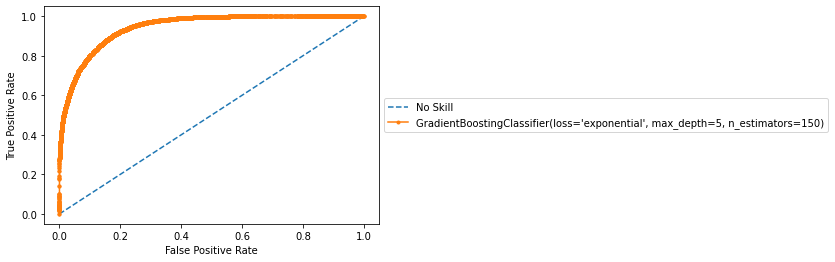

In [8]:
plot_results(best_model, feature_df, target_df)

## Saving best model and outpout

Save model and featue importances


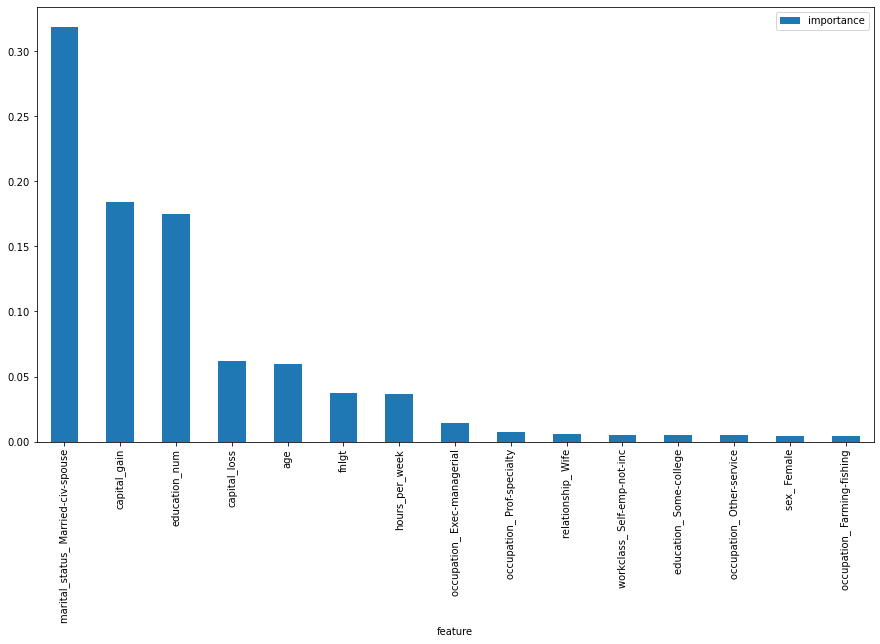

In [9]:
# Save feature importances
print("Save model and featue importances")
importances = best_model.feature_importances_
feature_importances = pd.DataFrame({'feature':feature_df.columns, 'importance':importances})
feature_importances.sort_values(by='importance', ascending=False, inplace=True)
feature_importances.set_index('feature', inplace=True, drop=True)

# plot feature importances
feature_importances[0:15].plot.bar(figsize=(15,8))
plt.show()

#save feature encoder, model and  results
save_results(best_model, ct, roc_auc_dict[model], feature_importances, model_dir)